In [1]:
## Random Forest
## import library

import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Input data
path = '/content/drive/MyDrive/training_ml_geospasial_geosoftware/sesi5-AlgoSupervisedDataVektor/Processed JKT/processed_jkt.shp'

In [3]:
data = gpd.read_file(path)

In [4]:
## Melihat informasi data
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECT_ID   267 non-null    float64 
 1   KODE_DESA   267 non-null    object  
 2   DESA        267 non-null    object  
 3   KODE        267 non-null    float64 
 4   PROVINSI    267 non-null    object  
 5   KAB_KOTA    267 non-null    object  
 6   KECAMATAN   267 non-null    object  
 7   DESA_KELUR  267 non-null    object  
 8   JUMLAH_PEN  267 non-null    float64 
 9   JUMLAH_KK   267 non-null    float64 
 10  LUAS_WILAY  267 non-null    float64 
 11  KEPADATAN   267 non-null    float64 
 12  PERPINDAHA  267 non-null    float64 
 13  PERUBAHAN   267 non-null    float64 
 14  WAJIB_KTP   267 non-null    float64 
 15  ISLAM       267 non-null    float64 
 16  KRISTEN     267 non-null    float64 
 17  KHATOLIK    267 non-null    float64 
 18  HINDU       267 non-null    float64 
 19  

In [5]:
data.crs

<Projected CRS: EPSG:32748>
Name: WGS 84 / UTM zone 48S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, southern hemisphere between 80°S and equator, onshore and offshore. Indonesia.
- bounds: (102.0, -80.0, 108.0, 0.0)
Coordinate Operation:
- name: UTM zone 48S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
## Check Korelasi Antar Data
## Tapi kita kickout dulu kolom yg type datanya diluar numeric
numeric_data = data.select_dtypes(include='number')

In [8]:
corr = numeric_data.corr()

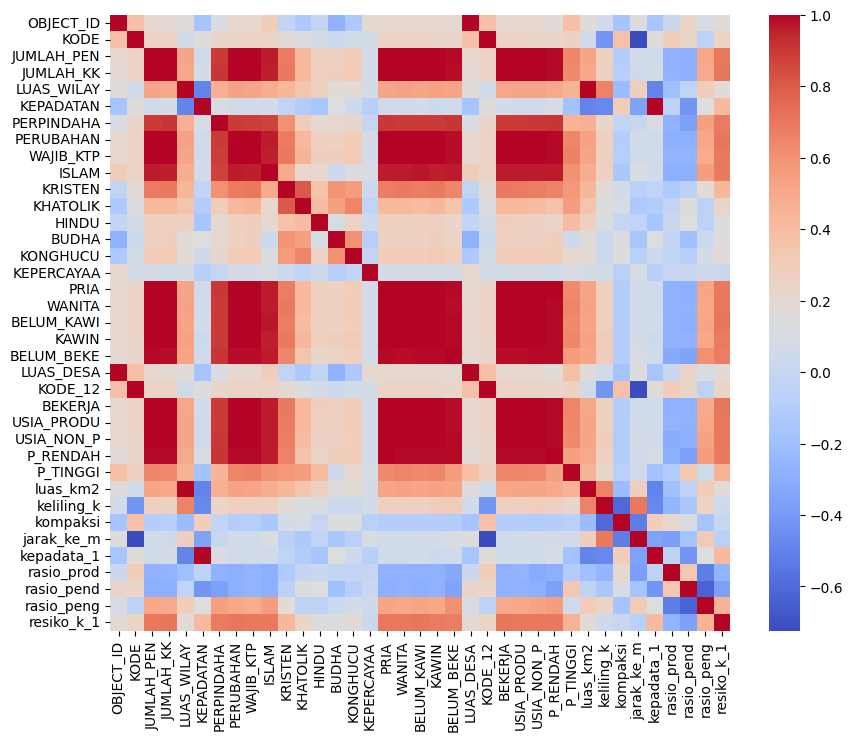

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.show()

In [15]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECT_ID   267 non-null    float64
 1   KODE        267 non-null    float64
 2   JUMLAH_PEN  267 non-null    float64
 3   JUMLAH_KK   267 non-null    float64
 4   LUAS_WILAY  267 non-null    float64
 5   KEPADATAN   267 non-null    float64
 6   PERPINDAHA  267 non-null    float64
 7   PERUBAHAN   267 non-null    float64
 8   WAJIB_KTP   267 non-null    float64
 9   ISLAM       267 non-null    float64
 10  KRISTEN     267 non-null    float64
 11  KHATOLIK    267 non-null    float64
 12  HINDU       267 non-null    float64
 13  BUDHA       267 non-null    float64
 14  KONGHUCU    267 non-null    float64
 15  KEPERCAYAA  267 non-null    float64
 16  PRIA        267 non-null    float64
 17  WANITA      267 non-null    float64
 18  BELUM_KAWI  267 non-null    float64
 19  KAWIN       267 non-null    f

In [45]:
## Memilih Fitur
X = numeric_data.drop(columns=['OBJECT_ID','KODE','KODE_12','jarak_ke_m','ISLAM','resiko_k_1'])
y = numeric_data['resiko_k_1']

In [46]:
## melakukan slit train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [47]:
X_test.shape

(54, 31)

In [48]:
X_train.shape

(213, 31)

In [49]:
## Membangun Model - Random Forest
rf = RandomForestClassifier(random_state=100)

In [50]:
## Melatih model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [51]:
## Evaluasi Model
y_pred = rf.predict(X_test)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.93      0.62      0.74        21
           2       0.78      0.97      0.86        29

    accuracy                           0.83        54
   macro avg       0.90      0.86      0.87        54
weighted avg       0.85      0.83      0.83        54



In [53]:
print(confusion_matrix(y_test, y_pred))

[[ 4  0  0]
 [ 0 13  8]
 [ 0  1 28]]


In [59]:
print(accuracy_score(y_test, y_pred))

0.8333333333333334


In [60]:
## Fitur Analisys
importances = rf.feature_importances_

In [61]:
importances

array([0.03651602, 0.05854594, 0.02976312, 0.08002925, 0.1431991 ,
       0.02736068, 0.03626756, 0.00948901, 0.00853082, 0.00879641,
       0.00933548, 0.00648278, 0.00270504, 0.03290544, 0.02385065,
       0.03006622, 0.01858041, 0.04464573, 0.00904688, 0.04083243,
       0.02898005, 0.05622765, 0.0998392 , 0.01056703, 0.02463576,
       0.02056882, 0.00923737, 0.06255713, 0.0070209 , 0.01352494,
       0.00989217])

In [62]:
features_names = X.columns

In [63]:
feat_imp_df = pd.DataFrame({'Features': features_names, 'Importance': importances})

In [64]:
feat_imp_df

,Features,Importance
0,JUMLAH_PEN,0.036516
1,JUMLAH_KK,0.058546
2,LUAS_WILAY,0.029763
3,KEPADATAN,0.080029
4,PERPINDAHA,0.143199
5,PERUBAHAN,0.027361
6,WAJIB_KTP,0.036268
7,KRISTEN,0.009489
8,KHATOLIK,0.008531
9,HINDU,0.008796


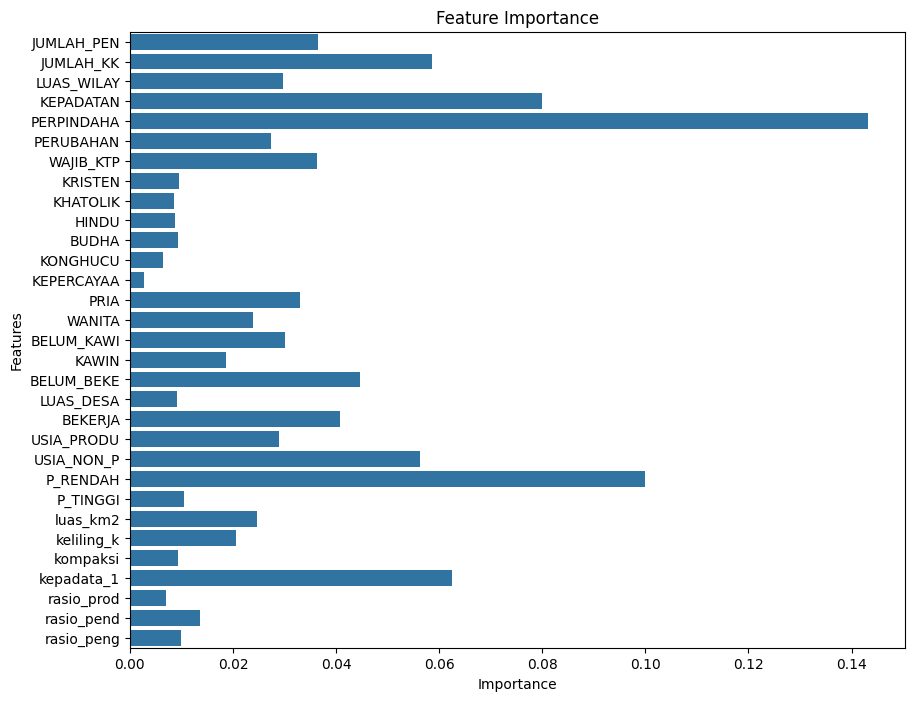

In [65]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Features', data=feat_imp_df)
plt.title('Feature Importance')
plt.show()

In [66]:
## Hyperparameter tuning
## enaknya kita ga perlu tulis manual
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [68]:
## cv = cross validation
## estimator nama model
## bisa tambah juga verbose
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy',verbose=2)

In [69]:
## melatih model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [70]:
## Model Evaluasi
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8778516057585826


In [71]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [73]:
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(accuracy_score(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.93      0.62      0.74        21
           2       0.78      0.97      0.86        29

    accuracy                           0.83        54
   macro avg       0.90      0.86      0.87        54
weighted avg       0.85      0.83      0.83        54

[[ 4  0  0]
 [ 0 13  8]
 [ 0  1 28]]
0.8333333333333334


In [74]:
## visualisasi data spasial
data['predisksi_rf'] = best_model.predict(X)


In [75]:
data

,OBJECT_ID,KODE_DESA,DESA,KODE,PROVINSI,KAB_KOTA,KECAMATAN,DESA_KELUR,JUMLAH_PEN,JUMLAH_KK,LUAS_WILAY,KEPADATAN,PERPINDAHA,PERUBAHAN,WAJIB_KTP,ISLAM,KRISTEN,KHATOLIK,HINDU,BUDHA,KONGHUCU,KEPERCAYAA,PRIA,WANITA,BELUM_KAWI,KAWIN,BELUM_BEKE,GENERATED,KODE_DES_1,LUAS_DESA,KODE_DES_3,DESA_KEL_1,KODE_12,BEKERJA,USIA_PRODU,USIA_NON_P,P_RENDAH,P_TINGGI,resiko_kre,luas_km2,keliling_k,kompaksi,jarak_ke_m,kepadata_1,rasio_prod,rasio_pend,rasio_peng,resiko_k_1,geometry,predisksi_rf
0,25477.0,3173031006,KEAGUNGAN,317303.0,DKI JAKARTA,JAKARTA BARAT,TAMAN SARI,KEAGUNGAN,21609.0,7255.0,0.36,60504.0,102.0,20464.0,16027.0,15735.0,2042.0,927.0,15.0,2888.0,2.0,0.0,11049.0,10560.0,10193.0,10652.0,3927.0,30 Juni 2019,3173031006,25476.0,3173031006,KEAGUNGAN,317303.0,38012.0,15269.0,6340.0,19778.0,1831.0,Medium,0.353146,2.593777,0.659629,3.039610,61189.911080,0.706604,0.084733,0.181730,1,"POLYGON ((700996.989 9320062.881, 701010.095 9...",1
1,25478.0,3173031007,GLODOK,317303.0,DKI JAKARTA,JAKARTA BARAT,TAMAN SARI,GLODOK,9069.0,3273.0,0.37,24527.0,25.0,8724.0,7375.0,1842.0,2041.0,1460.0,9.0,3716.0,1.0,0.0,4404.0,4665.0,4240.0,4364.0,1388.0,30 Juni 2019,3173031007,25477.0,3173031007,GLODOK,317303.0,16409.0,6282.0,2787.0,7484.0,1585.0,Low,0.365613,2.405313,0.794124,3.703862,24804.913958,0.692689,0.174771,0.153049,0,"POLYGON ((700826.428 9320688.895, 700832.458 9...",0
2,25397.0,3171031003,HARAPAN MULIA,317103.0,DKI JAKARTA,JAKARTA PUSAT,KEMAYORAN,HARAPAN MULIA,29085.0,9217.0,0.53,54465.0,131.0,27497.0,20926.0,26328.0,1710.0,531.0,42.0,469.0,5.0,0.0,14696.0,14389.0,14022.0,13450.0,5335.0,30 Juni 2019,3171031003,25396.0,3171031003,HARAPAN MULIA,317103.0,52553.0,20392.0,8693.0,25230.0,3855.0,High,0.528013,3.645967,0.499147,3.212556,55083.883622,0.701117,0.132543,0.183428,2,"POLYGON ((705543.36 9317220.295, 705544.961 93...",2
3,25400.0,3171031006,CEMPAKA BARU,317103.0,DKI JAKARTA,JAKARTA PUSAT,KEMAYORAN,CEMPAKA BARU,41913.0,13766.0,0.97,42993.0,170.0,38323.0,30264.0,36813.0,3392.0,1082.0,127.0,495.0,1.0,3.0,21063.0,20850.0,20336.0,19487.0,8105.0,30 Juni 2019,3171031006,25399.0,3171031006,CEMPAKA BARU,317103.0,74879.0,29358.0,12555.0,35499.0,6414.0,High,0.963938,5.140281,0.458443,4.014493,43481.014371,0.700451,0.153031,0.193377,2,"POLYGON ((706164.28 9318289.211, 706174.68 931...",2
4,25378.0,3101011001,PULAU PANGGANG,310101.0,DKI JAKARTA,KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,6947.0,2026.0,0.93,7497.0,17.0,6853.0,4775.0,6941.0,6.0,0.0,0.0,0.0,0.0,0.0,3547.0,3400.0,3366.0,3224.0,1788.0,30 Juni 2019,3101011001,25377.0,3101011001,PULAU PANGGANG,310101.0,11808.0,4777.0,2170.0,6500.0,447.0,Low,0.917482,15.585964,0.047461,55.765226,7571.808313,0.687635,0.064344,0.257377,0,"MULTIPOLYGON (((670288.457 9369801.077, 670457...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,25640.0,3175101004,MUNJUL,317510.0,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,MUNJUL,28722.0,8889.0,2.07,13848.0,68.0,26477.0,20423.0,26328.0,1726.0,480.0,144.0,32.0,0.0,12.0,14417.0,14305.0,13549.0,13858.0,5882.0,30 Juni 2019,3175101004,25639.0,3175101004,MUNJUL,317510.0,49307.0,20124.0,8598.0,24658.0,4064.0,Low,2.049410,6.429442,0.623006,20.792354,14014.763159,0.700648,0.141494,0.204791,0,"POLYGON ((710530.025 9297468.608, 710539.275 9...",0
263,25641.0,3175101005,SETU,317510.0,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,SETU,24722.0,7529.0,2.94,8406.0,91.0,22936.0,17296.0,22931.0,1287.0,401.0,62.0,29.0,0.0,12.0,12438.0,12284.0,11724.0,12225.0,5031.0,30 Juni 2019,3175101005,25640.0,3175101005,SETU,317510.0,41460.0,17156.0,7566.0,20808.0,3914.0,Low,2.906733,10.448618,0.334578,18.011577,8505.080645,0.693957,0.158321,0.203503,0,"POLYGON ((711848.807 9302982.969, 711913.971 9...",0
264,25642.0,3175101006,BAMBU APUS,317510.0,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,31774.0,9996.0,3.08,10308.0,87.0,29397.0,22644.0,28516.0,2330.0,840.0,51

In [76]:
label_mapping = {
    0: 'Low',
    1: 'Medium',
    2: 'High'
}

data['predisksi_rf_label'] = data['predisksi_rf'].map(label_mapping)

In [77]:
data

,OBJECT_ID,KODE_DESA,DESA,KODE,PROVINSI,KAB_KOTA,KECAMATAN,DESA_KELUR,JUMLAH_PEN,JUMLAH_KK,LUAS_WILAY,KEPADATAN,PERPINDAHA,PERUBAHAN,WAJIB_KTP,ISLAM,KRISTEN,KHATOLIK,HINDU,BUDHA,KONGHUCU,KEPERCAYAA,PRIA,WANITA,BELUM_KAWI,KAWIN,BELUM_BEKE,GENERATED,KODE_DES_1,LUAS_DESA,KODE_DES_3,DESA_KEL_1,KODE_12,BEKERJA,USIA_PRODU,USIA_NON_P,P_RENDAH,P_TINGGI,resiko_kre,luas_km2,keliling_k,kompaksi,jarak_ke_m,kepadata_1,rasio_prod,rasio_pend,rasio_peng,resiko_k_1,geometry,predisksi_rf,predisksi_rf_label
0,25477.0,3173031006,KEAGUNGAN,317303.0,DKI JAKARTA,JAKARTA BARAT,TAMAN SARI,KEAGUNGAN,21609.0,7255.0,0.36,60504.0,102.0,20464.0,16027.0,15735.0,2042.0,927.0,15.0,2888.0,2.0,0.0,11049.0,10560.0,10193.0,10652.0,3927.0,30 Juni 2019,3173031006,25476.0,3173031006,KEAGUNGAN,317303.0,38012.0,15269.0,6340.0,19778.0,1831.0,Medium,0.353146,2.593777,0.659629,3.039610,61189.911080,0.706604,0.084733,0.181730,1,"POLYGON ((700996.989 9320062.881, 701010.095 9...",1,Medium
1,25478.0,3173031007,GLODOK,317303.0,DKI JAKARTA,JAKARTA BARAT,TAMAN SARI,GLODOK,9069.0,3273.0,0.37,24527.0,25.0,8724.0,7375.0,1842.0,2041.0,1460.0,9.0,3716.0,1.0,0.0,4404.0,4665.0,4240.0,4364.0,1388.0,30 Juni 2019,3173031007,25477.0,3173031007,GLODOK,317303.0,16409.0,6282.0,2787.0,7484.0,1585.0,Low,0.365613,2.405313,0.794124,3.703862,24804.913958,0.692689,0.174771,0.153049,0,"POLYGON ((700826.428 9320688.895, 700832.458 9...",0,Low
2,25397.0,3171031003,HARAPAN MULIA,317103.0,DKI JAKARTA,JAKARTA PUSAT,KEMAYORAN,HARAPAN MULIA,29085.0,9217.0,0.53,54465.0,131.0,27497.0,20926.0,26328.0,1710.0,531.0,42.0,469.0,5.0,0.0,14696.0,14389.0,14022.0,13450.0,5335.0,30 Juni 2019,3171031003,25396.0,3171031003,HARAPAN MULIA,317103.0,52553.0,20392.0,8693.0,25230.0,3855.0,High,0.528013,3.645967,0.499147,3.212556,55083.883622,0.701117,0.132543,0.183428,2,"POLYGON ((705543.36 9317220.295, 705544.961 93...",2,High
3,25400.0,3171031006,CEMPAKA BARU,317103.0,DKI JAKARTA,JAKARTA PUSAT,KEMAYORAN,CEMPAKA BARU,41913.0,13766.0,0.97,42993.0,170.0,38323.0,30264.0,36813.0,3392.0,1082.0,127.0,495.0,1.0,3.0,21063.0,20850.0,20336.0,19487.0,8105.0,30 Juni 2019,3171031006,25399.0,3171031006,CEMPAKA BARU,317103.0,74879.0,29358.0,12555.0,35499.0,6414.0,High,0.963938,5.140281,0.458443,4.014493,43481.014371,0.700451,0.153031,0.193377,2,"POLYGON ((706164.28 9318289.211, 706174.68 931...",2,High
4,25378.0,3101011001,PULAU PANGGANG,310101.0,DKI JAKARTA,KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,6947.0,2026.0,0.93,7497.0,17.0,6853.0,4775.0,6941.0,6.0,0.0,0.0,0.0,0.0,0.0,3547.0,3400.0,3366.0,3224.0,1788.0,30 Juni 2019,3101011001,25377.0,3101011001,PULAU PANGGANG,310101.0,11808.0,4777.0,2170.0,6500.0,447.0,Low,0.917482,15.585964,0.047461,55.765226,7571.808313,0.687635,0.064344,0.257377,0,"MULTIPOLYGON (((670288.457 9369801.077, 670457...",0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,25640.0,3175101004,MUNJUL,317510.0,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,MUNJUL,28722.0,8889.0,2.07,13848.0,68.0,26477.0,20423.0,26328.0,1726.0,480.0,144.0,32.0,0.0,12.0,14417.0,14305.0,13549.0,13858.0,5882.0,30 Juni 2019,3175101004,25639.0,3175101004,MUNJUL,317510.0,49307.0,20124.0,8598.0,24658.0,4064.0,Low,2.049410,6.429442,0.623006,20.792354,14014.763159,0.700648,0.141494,0.204791,0,"POLYGON ((710530.025 9297468.608, 710539.275 9...",0,Low
263,25641.0,3175101005,SETU,317510.0,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,SETU,24722.0,7529.0,2.94,8406.0,91.0,22936.0,17296.0,22931.0,1287.0,401.0,62.0,29.0,0.0,12.0,12438.0,12284.0,11724.0,12225.0,5031.0,30 Juni 2019,3175101005,25640.0,3175101005,SETU,317510.0,41460.0,17156.0,7566.0,20808.0,3914.0,Low,2.906733,10.448618,0.334578,18.011577,8505.080645,0.693957,0.158321,0.203503,0,"POLYGON ((711848.807 9302982.969, 711913.971 9...",0,Low
264,25642.0,3175101006,BAMBU APUS,317510.0,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,31774.0,9996.0,3

(np.float64(650045.623731629),
 np.float64(721565.3761962318),
 np.float64(9288851.252606794),
 np.float64(9433362.242376931))

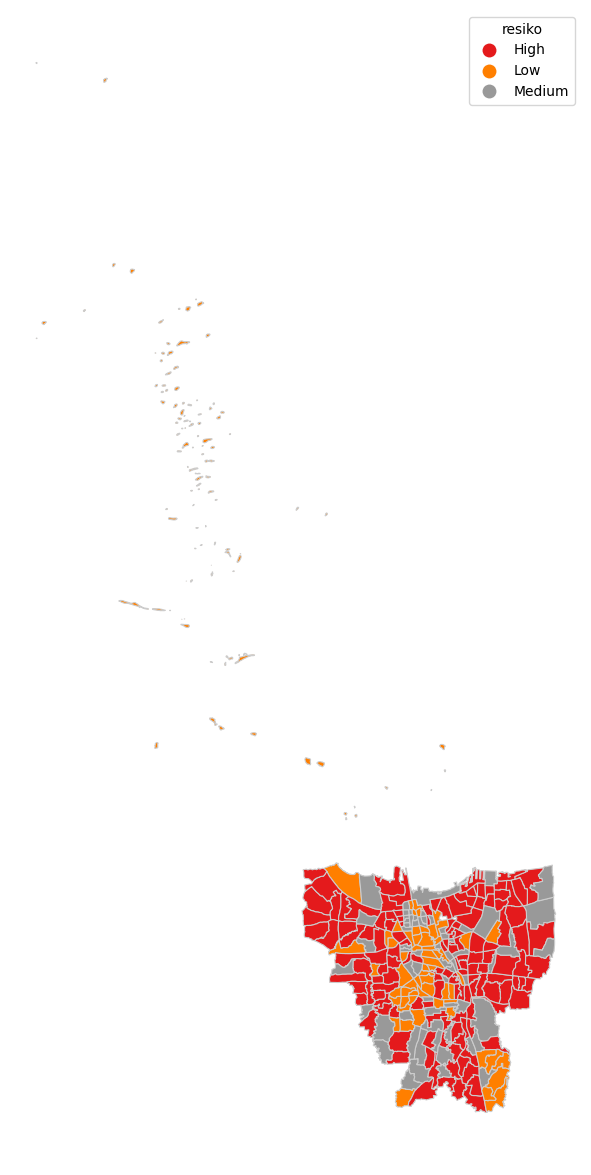

In [86]:
## Visualisasi
fig, ax = plt.subplots(figsize=(15, 15))
data.plot(column='predisksi_rf_label', cmap='Set1', linewidth=0.8, ax=ax, edgecolor='0.8', categorical = True, legend = True, legend_kwds={'title':'resiko'})
ax.axis('off')



In [87]:
## Menyimpan hasil
output_path = '/content/drive/MyDrive/training_ml_geospasial_geosoftware/sesi5-AlgoSupervisedDataVektor/Processed JKT/processed_jkt_rf.shp'
data.to_file(output_path)